In [121]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

# PCA y SMOTE

In [123]:
data_pulsar.head() ##Visualización de los datos

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
#Escalamiento 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_pulsar)
head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns = head)

X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

In [0]:
#Split de los datos
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train_sca, X_val, y_train_sca, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

In [0]:
#https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#r88acb9955f91-2
#SMOTE
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
smt = SVMSMOTE()
X_train, y_train = smt.fit_resample(X_train_sca, y_train_sca)


In [127]:
y_train_sca.value_counts()

0    11020
1     1150
Name: is_pulsar, dtype: int64

In [128]:
y_smote = pd.Series(y_train)
y_smote.value_counts()

1    11020
0    11020
dtype: int64

In [129]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
pca_cargas = pca.components_
pca_cargas

array([[ 9.89431116e-02,  1.97535093e-03, -4.11681707e-03,
        -1.34262057e-02, -2.16185201e-01, -1.85602333e-01,
         4.54061479e-02,  9.52241126e-01],
       [-1.33534633e-01,  4.39048299e-02,  5.11123701e-03,
         1.31603709e-02,  8.78329871e-01,  3.56487277e-01,
        -2.71817122e-02,  2.84176287e-01],
       [ 9.57744164e-01,  1.74383798e-01, -3.41116950e-02,
        -1.50218149e-01,  1.55878186e-01,  1.06285953e-02,
        -1.63557177e-03, -6.46038410e-02],
       [-6.54271305e-02,  4.90763967e-02, -1.36346096e-03,
         1.35030048e-02,  3.87135026e-01, -9.13003511e-01,
         4.86508725e-02, -8.55029916e-02],
       [-2.07008707e-01,  9.14557972e-01, -2.84638045e-02,
        -3.35550106e-01, -8.21161305e-02,  2.40604558e-02,
        -2.06587777e-03,  9.03506201e-04],
       [ 8.72361674e-02,  3.58819112e-01,  1.03455664e-01,
         9.22890520e-01, -2.59754131e-02,  1.44242479e-02,
        -1.79972755e-02,  1.42345842e-03],
       [ 2.75309854e-03, -7.512333

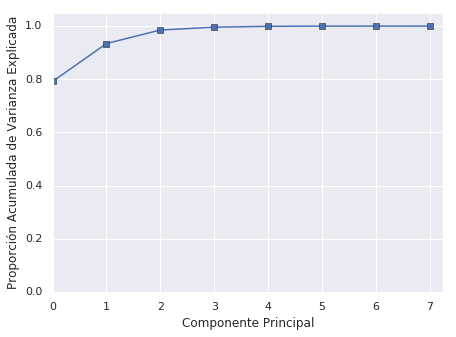

In [130]:
# Se obtiene la grafica de la PVE para los 8 componentes principales
plt.figure(figsize=(7,5))
plt.plot(range(0,8),np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0,7.25)
plt.ylim(0,1.05)
plt.xticks(range(0,8,1))
plt.show()

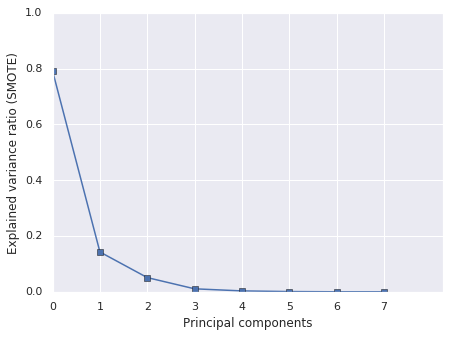

In [131]:
plt.figure(figsize=(7,5))
plt.plot(range(0,8),pca.explained_variance_ratio_, '-s')
#print(np.cumsum(pca.explained_variance_ratio_[0:3]))
plt.ylabel('Explained variance ratio (SMOTE)')
plt.xlabel('Principal components')
plt.xlim(0.75,8.25)
plt.ylim(0,1)
plt.xticks(range(0,8,1))
plt.show()

In [132]:
#Del analisis solo nos quedamos con los pesos que nos dan las 3 componentes principales
pesos_nuevo_espacio = pca_cargas[0:3]
pesos_nuevo_espacio

array([[ 0.09894311,  0.00197535, -0.00411682, -0.01342621, -0.2161852 ,
        -0.18560233,  0.04540615,  0.95224113],
       [-0.13353463,  0.04390483,  0.00511124,  0.01316037,  0.87832987,
         0.35648728, -0.02718171,  0.28417629],
       [ 0.95774416,  0.1743838 , -0.0341117 , -0.15021815,  0.15587819,
         0.0106286 , -0.00163557, -0.06460384]])

In [133]:
Z_train_npa = pca.transform(X_train)[:,:3]
Z_train =pd.DataFrame(Z_train_npa)
Z_train.head()

,0,1,2
0,98.339320,-5.842100,17.497342
1,103.702395,-2.378262,1.139401
2,66.414068,-16.604328,25.857465
3,-23.058563,-33.462683,26.714036
4,34.872498,-20.854520,3.909985


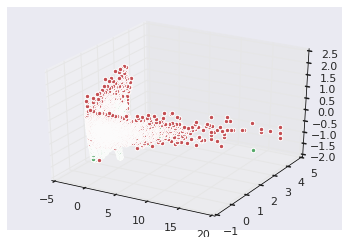

In [135]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,len(Z_train_npa)):
#for i in range(0,180):
  if y_smote[i]==0:
    ax.scatter(Z_train_npa[i,0], Z_train_npa[i,1], Z_train_npa[i,2], c='r', marker='o')
  else:
    ax.scatter(Z_train_npa[i,0], Z_train_npa[i,1], Z_train_npa[i,2], c='g', marker='o')
    
plt.show()

In [134]:
Z_train_npa =(Z_train_npa-np.mean(Z_train_npa))/np.std(Z_train_npa)
Z_train_npa

array([[ 1.60461162, -0.09532608,  0.28550572],
       [ 1.69212139, -0.03880632,  0.0185917 ],
       [ 1.08368438, -0.27093433,  0.4219186 ],
       ...,
       [-1.13642176,  0.03337908, -0.21944855],
       [-1.10080354, -0.05846427, -0.28091638],
       [-1.26521128,  0.31572881, -0.08426308]])

# CLASIFICACION DATA CON MENOS CARACTERISTICAS


## Algoritmo: Redes Neuronales por defecto

Error MSE:  0.03906533575317604


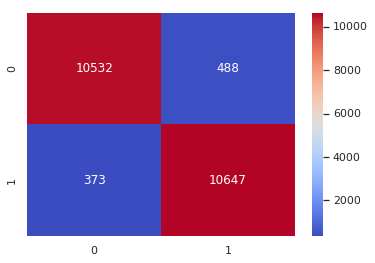

In [0]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier(activation= 'logistic',
solver= 'lbfgs')

NN_model.fit(Z_train, y_train) 
y_train_predict= NN_model.predict(Z_train)

from sklearn.metrics import mean_squared_error
NN_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",NN_model_mse)

from sklearn.metrics import confusion_matrix
NN_model_cm = confusion_matrix(y_train, y_train_predict)   

sns.heatmap(NN_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9609346642468239
precision 0.956174225415357
recall 0.9661524500907441
f1score 0.9611374407582938


### Evaluación con data de validacion

In [0]:
Z_val_npa = pca.transform(X_val)[:,:3]
Z_val =pd.DataFrame(Z_val_npa)
Z_val.head()

,0,1,2
0,105.590400,-2.994642,2.283878
1,147.882920,8.316199,2.692911
2,-14.631367,-30.524494,23.189346
3,-92.776269,95.889765,98.204780
4,75.355798,-12.615912,17.666142


Error MSE:  0.054222806441012156


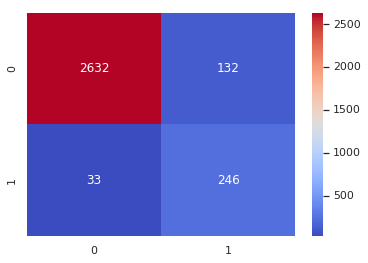

In [0]:
y_val_predict= NN_model.predict(Z_val)

NN_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",NN_model_mse_val)

NN_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(NN_model_cm_val,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9457771935589878
precision 0.6507936507936508
recall 0.8817204301075269
f1score 0.7488584474885845


## Algoritmo: SVM por defecto

Error MSE:  0.04500907441016334


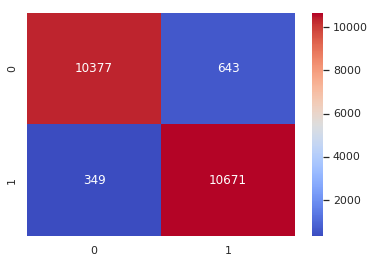

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

SVC_model = SVC(gamma='auto',kernel='rbf')
SVC_model.fit(Z_train, y_train)
y_train_predict= SVC_model.predict(Z_train)

SVM_grid_param = {  
    'C': [1, 10, 100],
    'gamma': ['auto',0.01, 0.0001],
    'kernel': ['rbf']
}

SVM_gd_sr = GridSearchCV(estimator=SVC_model,  
                     param_grid=SVM_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
SVM_gd_sr.fit(Z_train, y_train)


y_train_predict= SVM_gd_sr.best_estimator_.predict(Z_train)

SVC_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",SVC_model_mse)

SVC_model_cm = confusion_matrix(y_train, y_train_predict)   
sns.heatmap(SVC_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
SVM_gd_sr.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [0]:
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9549909255898367
precision 0.9431677567615344
recall 0.9683303085299455
f1score 0.9555834154204351


### Evaluación con data de validacion

Error MSE:  0.05816628327308577


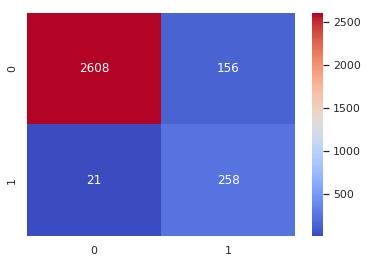

In [0]:
y_val_predict= SVM_gd_sr.best_estimator_.predict(Z_val)

SVC_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",SVC_model_mse_val)

SVC_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(SVC_model_cm_val,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9418337167269142
precision 0.6231884057971014
recall 0.9247311827956989
f1score 0.7445887445887445


## Algoritmo: Random Forest por defecto

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Error MSE:  0.002540834845735027


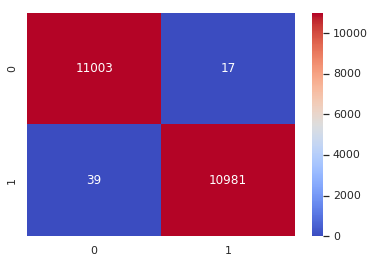

In [0]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(Z_train, y_train)
y_train_predict= RF_model.predict(Z_train)


RF_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",RF_model_mse)

RF_model_cm = confusion_matrix(y_train, y_train_predict)   
sns.heatmap(RF_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.997459165154265
precision 0.9984542644117113
recall 0.9964609800362977
f1score 0.9974566263965847


### Evaluación con data de validación





Error MSE:  0.04107788366743345


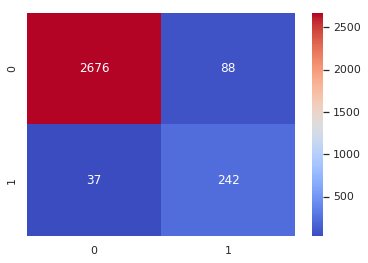

In [0]:
y_val_predict= RF_model.predict(Z_val)

RF_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",RF_model_mse_val)

RF_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(RF_model_cm_val,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9589221163325665
precision 0.7333333333333333
recall 0.8673835125448028
f1score 0.7947454844006567


## Algoritmo: KNN por defecto

Error MSE:  0.0


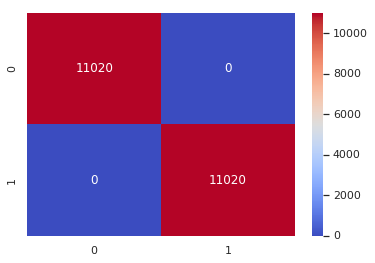

In [0]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5,
p=1,
weights='distance')
KNN_model.fit(Z_train, y_train)
y_train_predict= KNN_model.predict(Z_train)


KNN_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",KNN_model_mse)

KNN_model_cm = confusion_matrix(y_train, y_train_predict)   
sns.heatmap(KNN_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 1.0
precision 1.0
recall 1.0
f1score 1.0


### Evaluación con data de validación

Error MSE:  0.056194544857048966


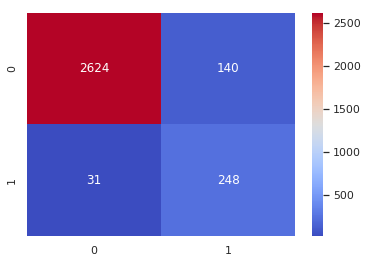

In [0]:
y_val_predict= KNN_model.predict(Z_val)

KNN_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",KNN_model_mse_val)

KNN_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(KNN_model_cm_val,annot=True, fmt="d", cmap="coolwarm")

In [0]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.943805455142951
precision 0.6391752577319587
recall 0.8888888888888888
f1score 0.7436281859070464
